In [289]:
from glob import glob
from vcf import Reader as vcf_reader
from numpy import polyfit
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# Min Var Freq

In [290]:
data = []
for f in glob('/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU*.vcf'):
    print (f)
    v = float("0.{}".format(f.split('_')[-2][4:]))
    with open(f) as vcf:
        for r in vcf_reader(vcf):
            data.append([v, r.REF, str(r.ALT[0])])
df_mvf = pd.DataFrame(data, columns=['min_var_freq', 'ref', 'alt'])

/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf006_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf014_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf010_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf002_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf016_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf020_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf018_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf012_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mvf/DT_uy_4_TU_mc10_mvf004_sp005.snp.filter.som.rec

In [291]:
df_mvf = df_mvf[df_mvf.ref != 'N']

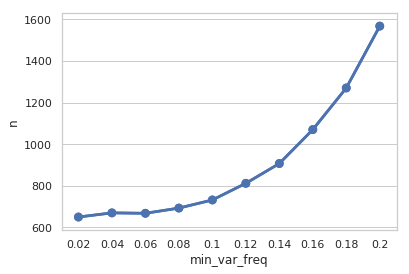

In [292]:
df_mvf_by_v = pd.DataFrame(df_mvf.groupby('min_var_freq').size()).rename(columns={0: 'n'}).reset_index()
sns.pointplot(data=df_mvf_by_v, x='min_var_freq', y='n')
sns.set(style="whitegrid")

i = 1
plot = sns.pointplot(data=df_mvf_by_v, x='min_var_freq', y='n')
fig = plot.get_figure()
while os.path.exists('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mvf/output', i)):
    i += 1
fig.savefig('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mvf/output', i))

In [293]:
df_mvf_by_v

min_var_freq     n
0          0.02   650
1          0.04   670
2          0.06   668
3          0.08   693
4          0.10   732
5          0.12   812
6          0.14   907
7          0.16  1070
8          0.18  1270
9          0.20  1567

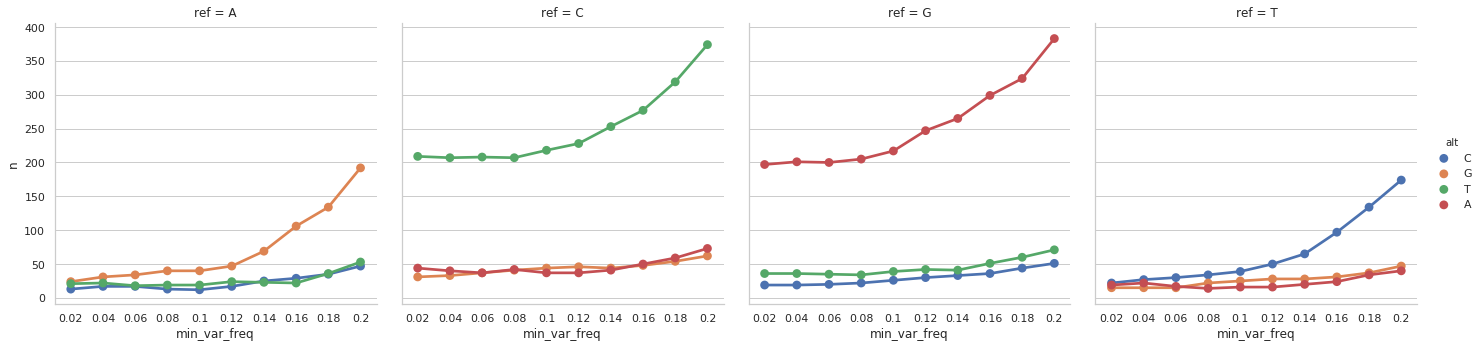

In [294]:
df_mvf_by_mut = pd.DataFrame(df_mvf.groupby(['min_var_freq', 'ref', 'alt']).size()).rename(columns={0: 'n'}).reset_index()
df_mvf_by_mut['perc'] = df_mvf_by_mut.n / df_mvf_by_mut.n.sum()

#savefigure
i = 1
fig = sns.catplot(data=df_mvf_by_mut, x='min_var_freq', y='n', hue='alt', col='ref', kind='point')
#fig = plot.savefig()
while os.path.exists('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mvf/output', i)):
    i += 1
fig.savefig('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mvf/output', i))

# Somatic P

In [295]:
data = []
for f in glob('/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU*.vcf'):
    print (f)
    v = float("0.{}".format(f.split('.')[0].split('_')[-1][3:]))
    with open(f) as vcf:
        for r in vcf_reader(vcf):
            data.append([v, r.REF, str(r.ALT[0])])
df_sp = pd.DataFrame(data, columns=['somatic_p', 'ref', 'alt'])

/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp009.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp004.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp007.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp006.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp003.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp010.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp001.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp002.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/sp/DT_uy_4_TU_mc10_mvf008_sp008.snp.filter.som.recode.vcf
/

In [296]:
df_sp = df_sp[df_sp.ref != 'N']

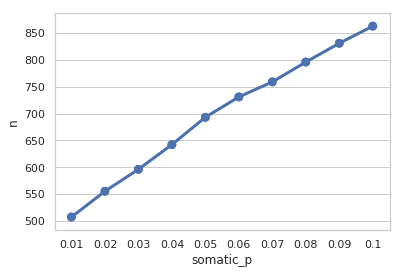

In [297]:
df_sp_by_v = pd.DataFrame(df_sp.groupby('somatic_p').size()).rename(columns={0: 'n'}).reset_index()
sns.pointplot(data=df_sp_by_v, x='somatic_p', y='n')

i = 1
plot = sns.pointplot(data=df_sp_by_v, x='somatic_p', y='n')
fig = plot.get_figure()
while os.path.exists('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/sp/output', i)):
    i += 1
fig.savefig('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/sp/output', i))

In [298]:
df_sp_by_v

somatic_p    n
0       0.01  507
1       0.02  555
2       0.03  596
3       0.04  642
4       0.05  693
5       0.06  731
6       0.07  759
7       0.08  796
8       0.09  831
9       0.10  863

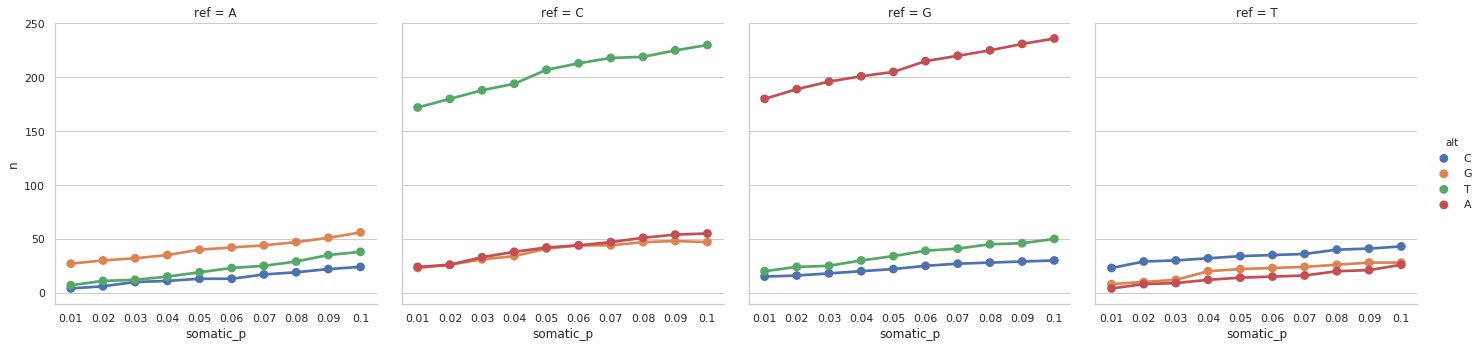

In [299]:
df_sp_by_mut = pd.DataFrame(df_sp.groupby(['somatic_p', 'ref', 'alt']).size()).rename(columns={0: 'n'}).reset_index()
df_sp_by_mut['perc'] = df_sp_by_mut.n / df_sp_by_mut.n.sum()

i = 1
fig = sns.catplot(data=df_sp_by_mut, x='somatic_p', y='n', hue='alt', col='ref', kind='point')

while os.path.exists('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/sp/output', i)):
    i += 1
fig.savefig('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/sp/output', i))

# Minimun Coverage

In [300]:
data = []
for f in glob('/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU*.vcf'):
    print (f)
    v = int(f.split('_')[-3][2:])
    with open(f) as vcf:
        for r in vcf_reader(vcf):
            data.append([v, r.REF, str(r.ALT[0])])
df_mc = pd.DataFrame(data, columns=['min_cov', 'ref', 'alt'])

/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc11_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc9_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc13_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc7_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc8_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc6_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc5_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc12_mvf008_sp005.snp.filter.som.recode.vcf
/home/hcampos/common_bioinformatics/files/vcf_somsig/mc/DT_uy_4_TU_mc4_mvf008_sp005.snp.filter.som.recode.vcf
/home/h

In [301]:
df_mc = df_mc[df_mc.ref != 'N']

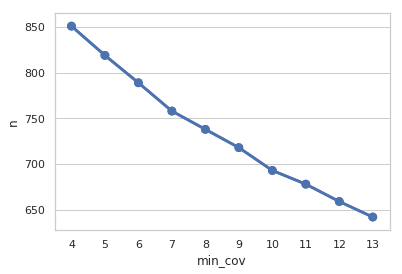

In [302]:
df_mc_by_v = pd.DataFrame(df_mc.groupby('min_cov').size()).rename(columns={0: 'n'}).reset_index()
sns.pointplot(data=df_mc_by_v, x='min_cov', y='n')

i = 1
plot = sns.pointplot(data=df_mc_by_v, x='min_cov', y='n')
fig = plot.get_figure()
while os.path.exists('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mc/output', i)):
    i += 1
fig.savefig('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mc/output', i))

In [303]:
df_mc_by_v

min_cov    n
0        4  851
1        5  819
2        6  789
3        7  758
4        8  738
5        9  718
6       10  693
7       11  678
8       12  659
9       13  642

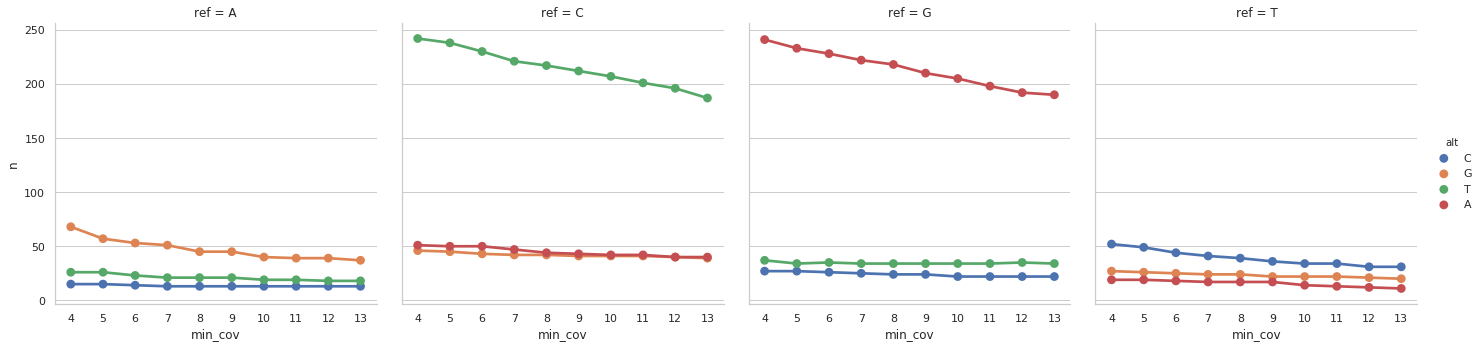

In [304]:
df_mc_by_mut = pd.DataFrame(df_mc.groupby(['min_cov', 'ref', 'alt']).size()).rename(columns={0: 'n'}).reset_index()
df_mc_by_mut['perc'] = df_mc_by_mut.n / df_mc_by_mut.n.sum()

i = 1
fig = sns.catplot(data=df_mc_by_mut, x='min_cov', y='n', hue='alt', col='ref', kind='point')
while os.path.exists('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mc/output', i)):
    i += 1
fig.savefig('{}{:d}.pdf'.format('/home/hcampos/thesis/memory/memory_used/figures/plot/variant_analysis/mc/output', i))